#`Regularization embedded method `

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Outcome'],test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [ ]:
X_test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.847178,0.534437,-0.350996,1.342663,3.397892,1.136640,0.212085,-1.037351
1,-0.254057,-0.469714,-0.752508,0.079996,0.665526,-0.117949,-0.541169,-0.788290
2,2.711548,-0.469714,0.150894,2.163396,-0.675200,0.611761,-0.893099,0.955142
3,-0.847178,-0.043710,0.552406,1.784596,1.021922,0.906205,2.144615,0.623060
4,0.635625,0.382293,0.552406,1.090130,2.464475,1.840746,-0.707873,1.038162


In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

In [ ]:
lasso.coef_

array([ 0.04340892,  0.17884678, -0.03577806, -0.        , -0.        ,
        0.08975907,  0.03349463,  0.04066266])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(np.abs(lasso.coef_),index=X_train.columns)
X=X.sort_values()

In [ ]:
X

,0
SkinThickness,0.000000
Insulin,0.000000
DiabetesPedigreeFunction,0.033495
BloodPressure,0.035778
Age,0.040663
Pregnancies,0.043409
BMI,0.089759
Glucose,0.178847


<Axes: >

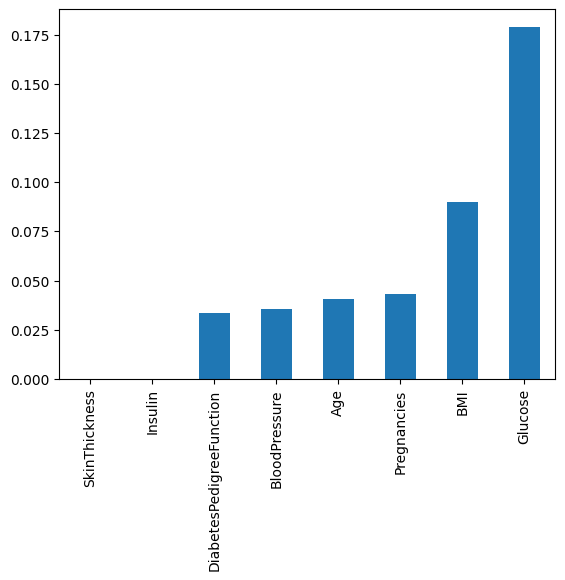

In [ ]:
X.plot(kind='bar')

In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.01)
R.fit(X_train_scaled,y_train)

Ridge(alpha=0.01)

In [ ]:
R.coef_

array([ 0.04992769,  0.18803974, -0.05221541,  0.00147827, -0.01154346,
        0.10226998,  0.04333956,  0.0474904 ])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(np.abs(R.coef_),index=X_train.columns)
X=X.sort_values()

In [ ]:
X

,0
SkinThickness,0.001478
Insulin,0.011543
DiabetesPedigreeFunction,0.043340
Age,0.047490
Pregnancies,0.049928
BloodPressure,0.052215
BMI,0.102270
Glucose,0.188040


<Axes: >

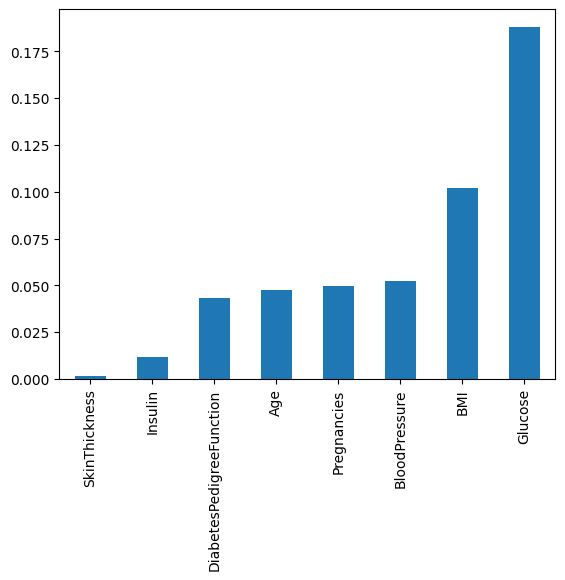

In [ ]:
X.plot(kind='bar')

In [ ]:
from sklearn.linear_model import ElasticNet
E=ElasticNet(alpha=0.01)
E.fit(X_train_scaled,y_train)

ElasticNet(alpha=0.01)

In [ ]:
E.coef_

array([ 0.04675797,  0.18159216, -0.04358358, -0.        , -0.00266056,
        0.09551017,  0.0380403 ,  0.04430376])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(np.abs(E.coef_),index=X_train.columns)
X=X.sort_values()
X

,0
SkinThickness,0.000000
Insulin,0.002661
DiabetesPedigreeFunction,0.038040
BloodPressure,0.043584
Age,0.044304
Pregnancies,0.046758
BMI,0.095510
Glucose,0.181592


<Axes: >

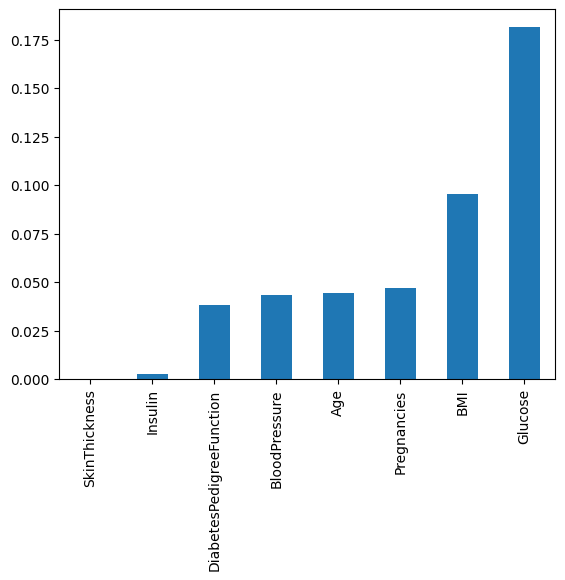

In [ ]:
X.plot(kind='bar')

#`Tree based embedded method `

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.04565904, 0.31470761, 0.08634487, 0.01602844, 0.09725331,
       0.2107823 , 0.12764239, 0.10158204])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(dt.feature_importances_,index=X_train.columns)
X=X.sort_values()
X

,0
SkinThickness,0.016028
Pregnancies,0.045659
BloodPressure,0.086345
Insulin,0.097253
Age,0.101582
DiabetesPedigreeFunction,0.127642
BMI,0.210782
Glucose,0.314708


<Axes: >

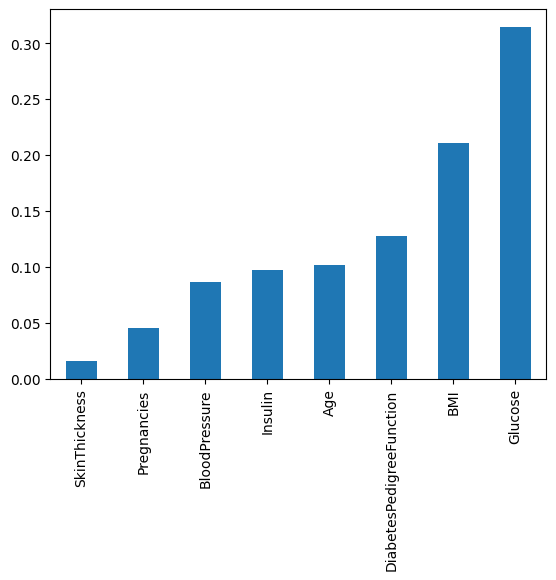

In [ ]:
X.plot(kind='bar')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier()
R.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
R.feature_importances_

array([0.08070602, 0.2659321 , 0.0900724 , 0.06325012, 0.06709702,
       0.17297847, 0.12852258, 0.13144129])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(R.feature_importances_,index=X_train.columns)
X=X.sort_values()
X

,0
SkinThickness,0.063250
Insulin,0.067097
Pregnancies,0.080706
BloodPressure,0.090072
DiabetesPedigreeFunction,0.128523
Age,0.131441
BMI,0.172978
Glucose,0.265932


<Axes: >

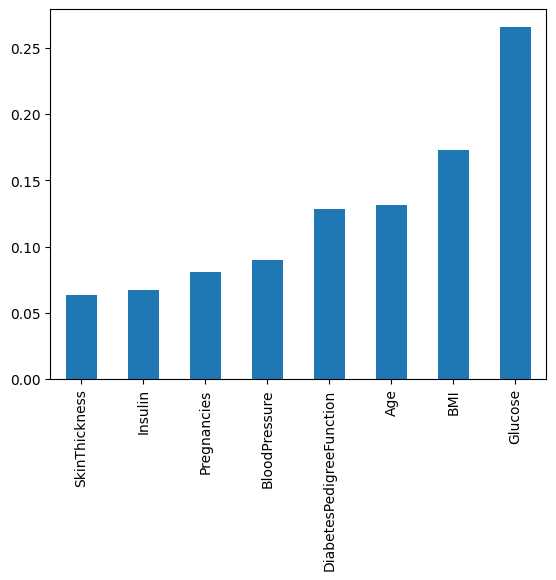

In [ ]:
X.plot(kind='bar')

In [ ]:
# pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
model.feature_importances_

array([0.0769745 , 0.28091547, 0.10510014, 0.07213265, 0.10296126,
       0.13280568, 0.0982476 , 0.13086274], dtype=float32)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=pd.Series(model.feature_importances_,index=X_train.columns)
X=X.sort_values()
X

,0
SkinThickness,0.072133
Pregnancies,0.076974
DiabetesPedigreeFunction,0.098248
Insulin,0.102961
BloodPressure,0.105100
Age,0.130863
BMI,0.132806
Glucose,0.280915


<Axes: >

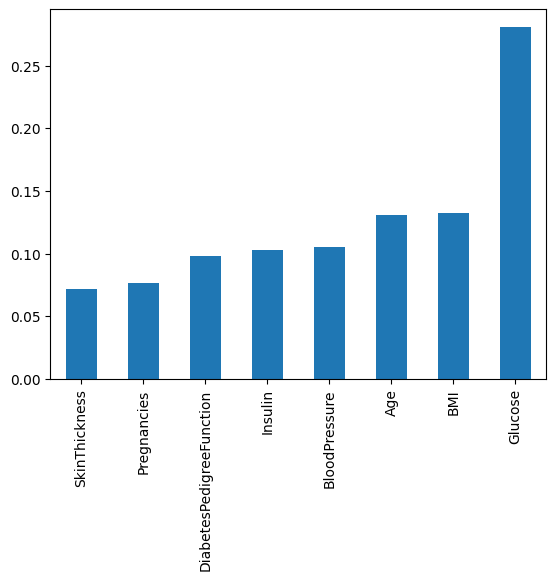

In [ ]:
X.plot(kind='bar')

#`selectfrommodel -embedded method`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(model,threshold=0.1)

In [ ]:
sfm.fit(X_train_scaled,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [ ]:
sfm.get_support(indices=True)

array([1, 5, 6, 7])

In [ ]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [ ]:
X_train_transform=sfm.transform(X_train_scaled)
X_train_transform=pd.DataFrame(X_train_transform,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])
X_train_transform

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,-0.045963,-0.335670,0.766369,0.073682
1,0.263482,-0.826830,0.040801,-0.958421
2,0.263482,-0.494965,-0.415357,0.073682
3,-0.324464,-0.269297,0.301026,-0.270353
4,-1.345633,-0.149826,-0.644968,-0.614387
...,...,...,...,...
609,2.027319,0.235138,1.124561,0.073682
610,1.439373,0.381158,1.366417,1.621835
611,-0.510131,-1.171969,0.310210,1.707844
612,-0.231630,-0.574613,-0.648029,2.825954


In [ ]:
X_test_transform=sfm.transform(X_test_scaled)
X_test_transform=pd.DataFrame(X_test_transform,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])
X_test_transform

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.820483,0.726298,1.660318,1.535827
1,1.686929,0.208588,0.025494,2.137886
2,0.015926,0.394433,0.714324,-0.270353
3,-1.159965,0.673199,-0.586800,-0.442370
4,0.480093,-0.640986,-0.697012,2.223895
...,...,...,...,...
149,0.139704,-0.269297,-0.335759,1.191792
150,2.058263,-0.017080,0.683710,-0.958421
151,-0.695798,-0.866654,-0.504140,-0.442370
152,-1.190910,-0.375494,0.943934,0.245699


In [ ]:
# Set up cross-validation scheme
from sklearn.model_selection import cross_val_score,KFold
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train_transform, y_train, cv=kfold1, scoring='accuracy')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test_transform, y_test, cv=kfold2, scoring='accuracy')
print('testing_data',np.mean(cv_score))

training_data 0.687043892120571
testing_data 0.7320833333333334


#`Recursive feature elimination`

In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(columns='Id')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Species'],test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
R= RandomForestClassifier()
R.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
R.feature_importances_

array([1.])

In [ ]:
X_train=X_train.drop(columns='SepalLengthCm')

In [ ]:
X_train=X_train.drop(columns='SepalWidthCm')

In [ ]:
X_train=X_train.drop(columns='PetalLengthCm')

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
RFE=RFE(estimator=model,n_features_to_select=1)
RFE.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=1)

In [ ]:
ranking=RFE.ranking_

In [ ]:
for i,feature in enumerate(X_train.columns):
  print(f"{feature} : {ranking[i]}")

SepalLengthCm : 3
SepalWidthCm : 4
PetalLengthCm : 1
PetalWidthCm : 2


In [ ]:
X_train=pd.DataFrame(X_train,columns=['PetalLengthCm'])

In [ ]:
X_test=pd.DataFrame(X_test,columns=['PetalLengthCm'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV, R^2 score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')  # 5-fold CV, R^2 score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.91666667 0.95833333 1.         0.875      0.95833333]
Mean CV Score: 0.9416666666666667
Cross-Validation Scores: [1.         1.         0.83333333 1.         1.        ]
Mean CV Score: 0.9666666666666668


#`Recursive Feature Elimination with Cross-Validation`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()

In [ ]:
from sklearn.feature_selection import RFECV
R=RFECV(estimator=model,step=1,scoring='accuracy',cv=5,min_features_to_select=2)
R.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), min_features_to_select=2,
      scoring='accuracy')

In [ ]:
# Results
print("Optimal number of features:", R.n_features_)
print("Selected features:", R.support_)
print("Feature ranking:", R.ranking_)

Optimal number of features: 3
Selected features: [ True False  True  True]
Feature ranking: [1 2 1 1]


In [ ]:
for i,feature in enumerate(X_train.columns):
  print(f"{feature} : {R.ranking_[i]}")

SepalLengthCm : 1
SepalWidthCm : 2
PetalLengthCm : 1
PetalWidthCm : 1


In [ ]:
# X_train_selected

In [ ]:
X_train_selected = R.transform(X_train)
X_test_selected = R.transform(X_test)

# Train the model on selected features and evaluate
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)
print("Accuracy with selected features:", accuracy)

Accuracy with selected features: 0.9666666666666667


#`Mutual information feature selection`

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['Species'],test_size=0.2)

In [ ]:
mi=mutual_info_classif(X_train,y_train)

In [ ]:
for i,mi_value in enumerate(mi):
  print(f"feature {i} mutual info. = {mi_value}")

feature 0 mutual info. = 0.5552737314293714
feature 1 mutual info. = 0.2561892636958554
feature 2 mutual info. = 1.0339216945334477
feature 3 mutual info. = 0.9720473462324382


#`with selectkbest`

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector=SelectKBest(mutual_info_classif,k=2)
selector.fit(X_train,y_train)

SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7c9bed6f8ee0>)

In [ ]:
cols=selector.get_support(indices=True)

In [ ]:
print(cols)

[2 3]


In [ ]:
X_train.iloc[:,[2,3]]

,PetalLengthCm,PetalWidthCm
79,3.5,1.0
99,4.1,1.3
41,1.3,0.3
125,6.0,1.8
44,1.9,0.4
...,...,...
140,5.6,2.4
143,5.9,2.3
131,6.4,2.0
2,1.3,0.2
